# Odkrywanie reguł asocjacyjnych

Będziemy korzystać z implementacji algorytmu Apriori w pakiecie `arules`. Składnia tworzenia zbioru reguł za pomocą funkcji `apriori()` jest następująca:

`apriori(data = mydata, parameter = list(support = 0.1, confidence = 0.8, minlen = 1))`

gdzie:
- `data` - macierz rozrzedzona z danymi transkacyjnymi
- `support` - określa minimalne wymagane wsparcie reguły. Domyślnym ustawieniem jest `support = 0.1`, co oznacza, że aby wygenerować regułę dla zbioru Groceries, artykuł musi pojawić się w przynajmniej $0.1 \cdot 9835 = 983.5$ transkacjach.
-  `confidence` - określa minimalną wymaganą ufność reguły
- `minlen` - określa minimalną wymaganą liczbę artykułów w regule

Funkcja zwraca obiekt reguł przechowujący wszystkie reguły, które spełniają kryteria minimalne.

Do ilustracji działania algorytmu użyjemy zbioru `Groceries` dostępnego w pakiecie `datasets`.

Dla zobrazowania, na wykresie umieszczono 20 najczęściej kupowanych produktów.

In [ ]:
#install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



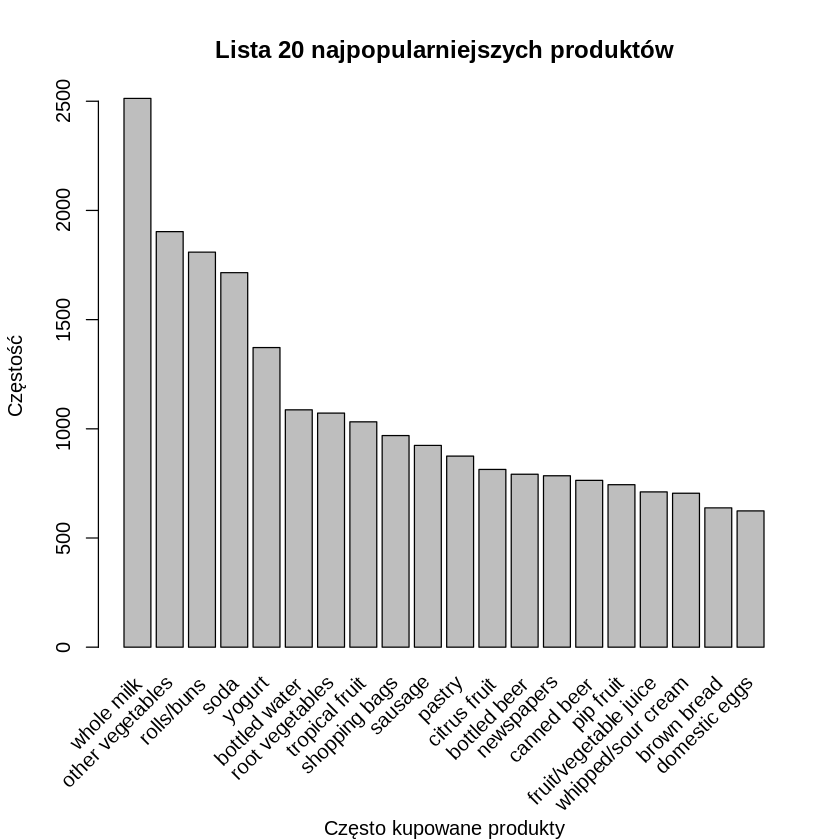

In [ ]:
library(arules)

data("Groceries")
itemFrequencyPlot(Groceries,topN=20,type="absolute", xlab = "Często kupowane produkty",
                  ylab = "Częstość", col = "Gray",
                  main = "Lista 20 najpopularniejszych produktów")

## Zadania

1. Utwórz zbiór reguł dla zbioru `Groceries`. Wsparcie ustaw na podstawie najmniejszej liczby transakcji wymaganej do tego, aby uznać wzorzec za interesujący, czyli np artykuły kupowane dwa razy dziennie (czyli 60 razy w danych z miesiąca), zatem wsparcie = 60/9835. Pozostałe wartości parametrów: ufność = 0.25 (reguła jest dołączana do wyników wtedy, kiedy działa w min 25% przypadków), minimalna liczba wymaganych artykułów = 2 (eliminujemy reguły zawierające mniej niż 2 elementy).

In [ ]:
min_support <- 60 / 9835

myrules <- apriori(Groceries, parameter = list(support = min_support, confidence = 0.25, minlen = 2))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
       0.25    0.1    1 none FALSE            TRUE       5 0.006100661      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Aby sprawdzić do czego służą parametry wymienione w pierwszych wierszach wyników, wpisz w konsoli polecenie `?APparameter`.

2. Wyświetl ogólny przegląd reguł asocjacyjnych za pomocą funkcji `summary()`. Rozmiar reguły obliczany jest jako suma lewej (`lhs`) i prawej (`rhs`) strony reguły.

In [ ]:
summary(myrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions     support confidence
 Groceries          9835 0.006100661       0.25
                                            

Miary `count` (liczebności) oraz `coverage` (pokrycia) są blisko związane ze wsparciem i ufnością. Liczebność jest licznikiem miary wsparcia (liczba transakcji, które zawierały artykuł). Miara pokrycia reguły asocjacji jest wsparciem lewej strony reguły (pokrycie to szansa, że reguła dotyczy dowolnej, losowo wybranej transakcji w zbiorze danych). Miara `lift` (dźwignia) reguły określa, o ile bardziej prawdopodobny jest zakup artykułu lub zbioru artykułów w stosunku do jego typowego wskaźnika kupna, jeśli wiadomo, że kupiony został inny artykuł lub zbiór artykułów.

3. Wyświetl pierwsze pięć reguł za pomocą funkcji `inspect()`.

In [ ]:
inspect(head(myrules, 5))

    lhs             rhs                support     confidence coverage  
[1] {pot plants} => {whole milk}       0.006914082 0.4000000  0.01728521
[2] {pasta}      => {whole milk}       0.006100661 0.4054054  0.01504830
[3] {herbs}      => {root vegetables}  0.007015760 0.4312500  0.01626843
[4] {herbs}      => {other vegetables} 0.007727504 0.4750000  0.01626843
[5] {herbs}      => {whole milk}       0.007727504 0.4750000  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   
[4] 2.454874 76   
[5] 1.858983 76   


Odczytaj i opisz w komentarzu pierwszą regułę.

## Sortowanie zbioru reguł asocjacyjnych

W zależności od celów analizy koszyka, najużyteczniejszymi regułami mogą być te, które mają najwyższe wsparcie, ufność lub dźwignię. Kolejność reguł możemy zmienić, stosując pakiet `arules` w połączneniu z funkcją `sort()`.

*Zadanie*
4. Wyświetl pięć reguł najlepszych pod względem dźwigni i wypisz wnioski.

In [ ]:
myrules_lift <- sort(myrules, by = "lift", decreasing = TRUE)

inspect(head(myrules_lift, 5))

    lhs                    rhs                      support confidence   coverage     lift count
[1] {herbs}             => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2] {berries}           => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3] {tropical fruit,                                                                            
     other vegetables,                                                                          
     whole milk}        => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4] {beef,                                                                                      
     other vegetables}  => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5] {tropical fruit,                                                                            
     other vegetables}  => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93


## Podzbiory reguł asocjacyjnych
Do wyszukiwania podzbiorów transakcji, artykułów lub reguł służy funkcja `subset()`.

*Zadanie*
5. Znajdź reguły, w których występują owoce jagodowe i zapisz w obiekcie `berryrules`. Następnie zbadaj te reguły (funkcja `inspect()`) i wypisz wnioski

In [ ]:
berryrules <- subset(myrules, items %in% "berries")

inspect(head(berryrules, 5))

    lhs          rhs                  support     confidence coverage  lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  0.0332486 3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  0.0332486 2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  0.0332486 1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  0.0332486 1.388328
    count
[1]  89  
[2] 104  
[3] 101  
[4] 116  


Owoce jagodowe najczęściej pojawiają się w koszykach z bitą/zwykłą śmietaną lub jogurtami. Wszystkie reguły mają dźwignię większą niż 1, co oznacza, że wszystkie te produkty są częściej kupowane razem z jagodami niż wynikałoby to z przypadku.